# Lab 4.4: Confidence Intervals

## Outline

- z-score
- t-distribution
- Confidence Interval Basics
- Confidence Interval for One Sample Mean

**Question 1**

1) Write down the standard Normal distribution.

   <br>

$ Z = \frac{\bar{X} - \mu}{\sigma / \sqrt{n}} \sim N(0, 1) $

2) z-score measures how many `__________` a value is from the mean.
   - units
   - variances
   - standard deviations
   - medians
   - modes

   <br>

standard deviations

3) Given a Normal distribution that has mean of 10.5 and variance of 3.2, compute the
   - z-score for observing a value of 8.3
   - probability of observing a z-score greater than the calculated value above
   
   <br>

In [1]:
%pylab inline
x = 8.3
mu = 10.5
var = 3.2
z_score = (x - mu)/np.sqrt(var)
z_score

Populating the interactive namespace from numpy and matplotlib


-1.229837387624884

In [2]:
from scipy import stats
prob = stats.norm(mu, np.sqrt(var)).cdf(x)
1 - prob

0.89062099773330372

4) Verify that the probability of observing a z-score greater than calculated in `3.` is same that the probability of observing a value greater than 8.3 from the original Normal distribution (with mean 10.5 and variance 3.2).  

   <br>

In [3]:
# Now, we will calculate using a stadard normal distribution, which has a mean of 0 and variance of 1.
z_prob = stats.norm(0, 1).cdf(z_score)
1 - z_prob

0.89062099773330372

   
5) For the standard Normal random variable $Z$, compute the following: 
1. $P(0.2 < Z \leq 1.4)$
2. $P(-1.48 \leq Z \leq 0.4)$
3. $P(Z > 1.23)$
4. $E(3 + 3Z)$
5. $Var(3 + 3Z)$  

   <br>

In [4]:
# 1
stats.norm(0, 1).cdf(1.4) - stats.norm(0, 1).cdf(0.2)

0.33998363132712595

In [5]:
# 2
stats.norm(0, 1).cdf(0.4) - stats.norm(0, 1).cdf(-1.48)

0.5859851182769924

In [6]:
# 3
1 - stats.norm(0, 1).cdf(1.23)

0.10934855242569186

#4
E(3 + 3Z) = E(3) + 3 * E(Z)

E(Z) = $\mu$ = 0, for a standard normal distribution.

So the result is E(3) + 0 = 3 + 0 = 3 

#5

We know that E[(3 + 3Z)] = 3

E[Z$^2$] = 1 for standard normal deviation.

Var(3 + 3Z) = E[(3 + 3Z)$^2$] - E[(3 + 3Z)]$^2$ = E[(3$^2$ + 2 x 3 x 3Z + (3Z)$^2$)] - 3$^2$, then

Var(3 + 3Z) = 3$^2$ + 0 + 3$^2$ = 18

**Question 2**
   
1) Visually, what is the difference between a t-distribution and a standard Normal distribution? 

   <br> 

t-distribution has fatter tails and the peak at $\mu$ lies lower than that of the standard Normal distribution.

   
2) Plot the pdf of the following distributions.  

* Standard Normal $N(0, 1)$
* $t_{5}$
* $t_{10}$
* $t_{100}$
* $t_{10000}$
   
   <br>

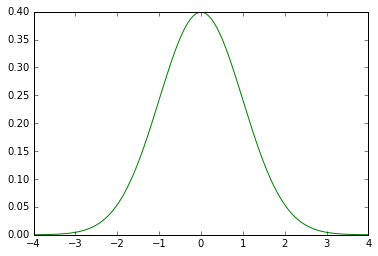

In [7]:
x = linspace(-4, 4, 1000)
norm = stats.norm(0,1)
plot(x, norm.pdf(x),color='green');

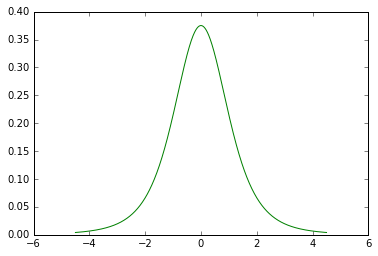

In [8]:
x = linspace(-4.5, 4.5, 1000)
df = 5 - 1
t_5 = stats.t(df)
plot(x, t_5.pdf(x),color='green');

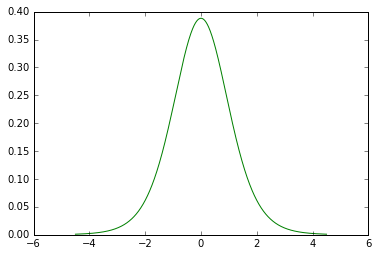

In [9]:
x = linspace(-4.5, 4.5, 1000)
df = 10 - 1
t_10 = stats.t(df)
plot(x, t_10.pdf(x),color='green');

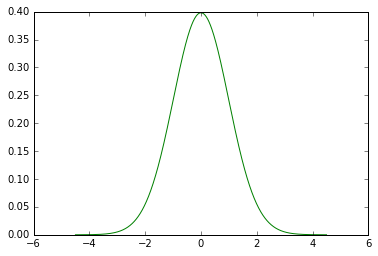

In [10]:
x = linspace(-4.5, 4.5, 1000)
df = 100 - 1
t_100 = stats.t(df)
plot(x, t_100.pdf(x),color='green');

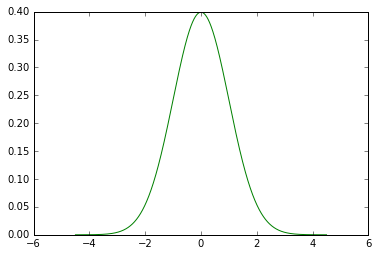

In [11]:
x = linspace(-4.5, 4.5, 1000)
df = 10000 - 1
t_10000 = stats.t(df)
plot(x, t_10000.pdf(x),color='green');

3) Comment on the plots. How does the shape of t-distribution change as the degrees of freedom change?   

   <br>

As the degrees of freedom, the tails get less fatter and the peak get higher at $\mu$. As n approaches $\infty$, the distribution gets closer to the standard Normal distribution.

**Question 3**

1) Explain why confidence interval is more informative than a point estimate.

   <br>

First of all, we will never know the true estimate. So it's much better to provide a confidence interval where such estimate can be found. By providing an interval instead of only one point, we get information about the variance.

2) Explain why the following statement is **wrong**:
   - The 95% confidence interval means there is a 95% chance that the true value lies in the interval.
   
   <br>

It's not about the true value, which will be always unknown. The 95% confidence interval means that if we had 100 different samples with the same sample size and created 100 different intervals, we would expect (on average) 95 out of 100 of them to contain the true (but unknown) mean.

3) Explain in plain words what the following means:
   - The 95% confidence interval of the click through rate to website A is 0.10 to 0.15

   <br>

We are 95% confident that the true click through rate to website A is somewhere between 0.10 and 0.15.

4) You are presented with 2 measurements below, select the measurement that is more precise and explain why that is.
   - **Measurement 1**: 5.00 cm with 95% confidence interval of (4.52 cm, 5.52 cm)
   - **Measurement 2**: 5.20 cm with 95% confidence interval of (5.13 cm, 5.22 cm)

   <br>

In [12]:
# Measurement 1
low_1 = 5 - 4.52
high_1 = 5.52 - 5
print("Interval 1:", low_1, high_1, abs(high_1 - low_1))

Interval 1: 0.4800000000000004 0.5199999999999996 0.03999999999999915


In [13]:
# Measurement 2
low_2 = 5.2 - 5.13
high_2 = 5.22 - 5.2
print("Interval 2:", low_2, high_2, abs(high_2 - low_2))

Interval 2: 0.07000000000000028 0.019999999999999574 0.05000000000000071


Measurement 1 is more precise because the interval is smaller (0.04) than Measurement 2 (0.05). Therefore, Measurement 1 is more precise.

5) Is a 99% confidence interval wider or narrower than a 90% confidence interval?  

   <br>

A 90% confidence interval is narrower compared to a 99% confidence interval because as the precision of the confidence interval increases, it's reliability of containing the actual mean decreases.

**Question 4**

1) Suppose Google sampled 200 of its employees and measured how long they are gone for lunch. 
   - Download the data from https://s3-us-west-2.amazonaws.com/dsci/6002/data/lunch_hour.txt (right click -> "Save Link As...")
   - Load the data by `numpy.loadtxt('lunch_hour_200.txt')`
   - Compute the mean lunch hour of the sample
   - Compute the 95% confidence interval for how long, on average, Google employees take to have lunch.
     (**_There is a python function to calculate this, which you will use later to verify your results; for this part, calculate it by following the formula given in class_**)

   <br>

In [14]:
google_data = np.loadtxt('lunch_hour.txt')
google_data.mean()

2.1844999999999999

In [15]:
google_data.std()

0.57732984506259499

In [16]:
n = len(google_data)
n

200

In [17]:
# 95% confidence interval:
# mean + 1.96 * sigma/sqrt(n), mean - 1.96 * sigma/sqrt(n)

interval_plus = google_data.mean() + 1.96 * google_data.std()/len(google_data)**(1/2)
interval_minus = google_data.mean() - 1.96 * google_data.std()/len(google_data)**(1/2)
print("95% confidence interval:", interval_minus, interval_plus)

95% confidence interval: 2.10448616571 2.26451383429


   
2) Suppose only the first 20 employees are sampled. Re-compute the 95% confidence interval based on this smaller sample.

   <br>

In [18]:
google_data_sample = google_data[0:20]
google_data_sample.mean()

2.1599999999999997

In [19]:
# 95% confidence interval:
# mean + 1.96 * sigma/sqrt(n), mean - 1.96 * sigma/sqrt(n)

interval_plus_sample = google_data_sample.mean() + 1.96 * google_data_sample.std()/len(google_data_sample)**(1/2)
interval_minus_sample = google_data_sample.mean() - 1.96 * google_data_sample.std()/len(google_data_sample)**(1/2)
print("95% confidence interval:", interval_minus_sample, interval_plus_sample)

95% confidence interval: 1.89254796318 2.42745203682


   
3) Use the following Python functions to verify your results above (which one should you use?):

```python
# Function to calculate z-based 95% CI
scipy.stats.norm.interval(0.95, mean, std)

# Function to calculate t-based 95% with 19 degrees of freedom
scipy.stats.t.interval(0.95, 19, mean, std)
```

   <br>

In [20]:
from scipy import stats
stats.norm.interval(0.95, google_data.mean(), google_data.std())

(1.052954296477224, 3.3160457035227759)

In [21]:
stats.norm.interval(0.95, google_data_sample.mean(), google_data_sample.std())

(0.9639401081774821, 3.3560598918225173)

In [22]:
stats.t.interval(0.95, 199, google_data.mean(), google_data.std())

(1.0460306338383265, 3.322969366161673)

In [23]:
stats.t.interval(0.95, 19, google_data_sample.mean(), google_data_sample.std())

(0.88274075246084416, 3.4372592475391555)

I would use t-based as this is a more accurate representation of reality.

**Question 5**

A survey is planned to determine the mean annual family medical expenses of employees of a large company. The management of the company wishes to be 95% confident that the sample mean is
correct to within +/- \$50 of the true population mean of annual family medical expenses. A pilot
study indicated the population standard deviation can be estimated to be $400.  

1) How large a sample size is needed?  


2) If management wants to be correct to within +/- \$25, what sample size is necessary?  


In [24]:
# 1
error_1 = 50
std = 400
n_1 = (1.96*std/error_1)**2
print("Sample size is:",int(n_1))

Sample size is: 245


In [25]:
# 2
error_2 = 25
std = 400
n_2 = (1.96*std/error_2)**2
print("Sample size is:",int(n_2))

Sample size is: 983
